# Wine Quality Prediction using Random Forests
Importing the Dependencies

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Red Wine Quality<br>
Dataset Link: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009?select=winequality-red.csv <br>
Simple and clean practice dataset for regression or classification modelling

In [2]:
# loading the dataset
dataset = pd.read_csv('winequality-red.csv')

In [4]:
row,col = dataset.shape
print('Dataset contains ',row,' rows and ',col,' columns.')

Dataset contains  1599  rows and  12  columns.


In [5]:
# first 5 rows
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# missing values
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data Analysis and Visulaization

In [ ]:
# statistical measures of the dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


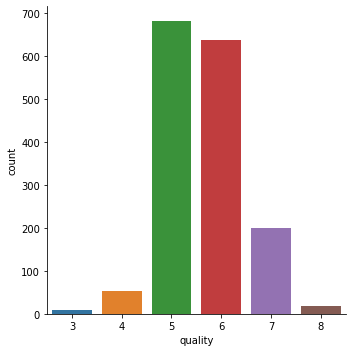

In [8]:
# quality of each attribute
sns.catplot(x='quality', data = dataset, kind = 'count')

Data Preprocessing

In [13]:
X = dataset.drop('quality',axis=1)

Label Binarizaton

In [14]:
Y = dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

Splitting dataset for training and testing

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [16]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


Random Forest Classifier

In [18]:
classifier = RandomForestClassifier()

In [20]:
classifier.fit(X_train, Y_train)

RandomForestClassifier()

Model Evaluation

In [23]:
# accuracy on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.93125


In [26]:
# Precision score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = precision_score(X_test_prediction, Y_test)
print('Precision score on test data : ', test_data_accuracy)

Precision score on test data :  0.5945945945945946


In [27]:
# Recall score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = recall_score(X_test_prediction, Y_test)
print('Recall score on test data : ', test_data_accuracy)

Recall score on test data :  0.7586206896551724


In [28]:
# Recall score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = f1_score(X_test_prediction, Y_test)
print('F1 Score score on test data : ', test_data_accuracy)

F1 Score score on test data :  0.6666666666666667


In [29]:
# Confusion Matrix on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = confusion_matrix(X_test_prediction, Y_test)
print(test_data_accuracy)

[[276  15]
 [  7  22]]


System for Random Prediction

In [32]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# Converting input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)

if (prediction[0]==1):
    print('Best Quality')
else:
    print('Bad Quality')

Bad Quality
